Files downloaded and unzipped successfully!

--- MODEL PERFORMANCE ---
R² Score: 0.6341
Mean Absolute Error: $35,788.06


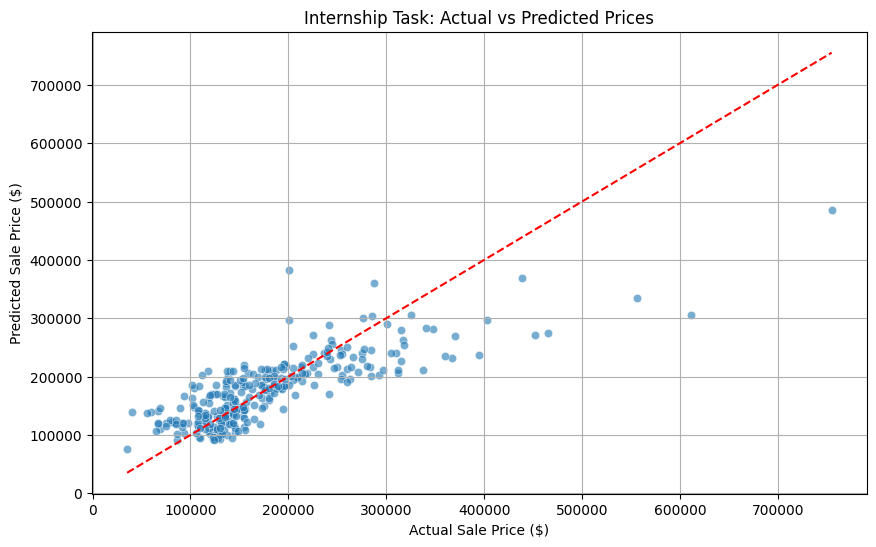

Predicted price: $240,377.51


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import zipfile

os.environ['KAGGLE_USERNAME'] = 'm230296'
os.environ['KAGGLE_KEY'] = '35000b6e73ae9650ab1d0fa28eeca51c'

try:
    import kaggle
except ImportError:
    os.system('pip install kaggle --quiet')

os.system('kaggle competitions download -c house-prices-advanced-regression-techniques')

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

print("Files downloaded and unzipped successfully!")

df = pd.read_csv("train.csv")

selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = df[selected_features].fillna(df[selected_features].median())
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("\n--- MODEL PERFORMANCE ---")
print(f"R² Score: {r2_score(y_test, predictions):.4f}")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, predictions):,.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Internship Task: Actual vs Predicted Prices")
plt.xlabel("Actual Sale Price ($)")
plt.ylabel("Predicted Sale Price ($)")
plt.grid(True)
plt.show()

sample_house = pd.DataFrame([[2000, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_val = model.predict(sample_house)
print(f"Predicted price: ${predicted_val[0]:,.2f}")
